In [2]:
import glob, os
from os import listdir
from os.path import isfile, join
import fnmatch
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
import pandas as pd
import astropy
from astropy.stats import BoxLeastSquares

import lightkurve as lk
import matplotlib.gridspec as gridspec


def ChauventsCriteron(x, y, z, mean=None, stdv=None):
    from scipy.special import erfc
    if mean is None:
        mean = y.mean()           # Mean of incoming array y
    if stdv is None:
        stdv = y.std()            # Its standard deviation
    N = len(y)                   # Lenght of incoming arrays
    criterion = 1.0/(2*N)        # Chauvenet's criterion
    d = abs(y-mean)/stdv         # Distance of a value to mean in stdv's
    d /= 2.0**0.5                # The left and right tail threshold values
    prob = erfc(d)               # Area normal dist.    
    filter = prob >= criterion   # The 'accept' filter array with booleans
    
    xf = x[filter]; yf = y[filter]; zf=z[filter]
    print ("criterion: ", criterion)
    print ("3*std:", std(y))
#     return filter                # Use boolean array outside this function
    return xf,yf,zf

Nsig=3; bin_size=5; window_size=201

In [3]:
#------------------------------Finding Downloaded TESS Data Files --------------------------------------
# path = '/Users/felizd/Desktop/Felix/TESSdata/' #location of where I put downloaded files
path = '/Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean' #location of where I put downloaded files

data = [os.path.join(dirpath, f) # an array of path names to be looped over
    for dirpath, dirnames, files in os.walk(path) #recursively searches through directory
    for f in fnmatch.filter(files, '*.lc')] #finds every file (*) that ends with .lc

print ("number of files: ",len(data)) #number of files)

# for d in range(len(data)):
#     print ("data set #", d+1 ," : ", data[d]) #I added the d+1 because python does zero-indexing (https://en.wikipedia.org/wiki/Zero-based_numbering)
#     print ("")

number of files:  1084


file number:  161 file name:  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/183494855_sector01_3_3.lc
x= /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/183494855_sector01_3_3.lc
ra:  18.3812 dec:  -76.0526
Creating our cleaned light curve using Ryan Oelker's pipeline
not using Chauvent's criterion


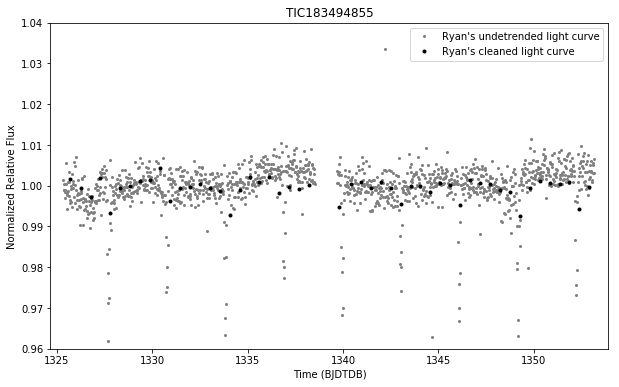

In [4]:
interesting = str(183494855)

for d in range(len(data)):
    if interesting in data[d]:
        print ("file number: ", d, "file name: ", data[d])
        x= data[d] #finding where specific light curve is in our cleaned light curve folder
        
print ("x=", x)        
print ("ra: ", 18.3812, "dec: ", -76.0526) 

print("Creating our cleaned light curve using Ryan Oelker's pipeline")

Nsig=3; bin_size=5; window_size=201; spacing=0.02


time     = np.transpose(np.loadtxt(x))[0] #first  (zero indexing in python) column 
mag      = np.transpose(np.loadtxt(x))[1] #second (zero indexing in python) column 
magerror = np.transpose(np.loadtxt(x))[2] #third (zero indexing in python) column 

mask = np.where(np.isnan(mag)==False)[0] #creating array of only real numbers by setting np.isnan(mag)==False. 
time = time[mask]                        #Sometimes there are holes in data filled with NaNs
mag = mag[mask]
magerror = magerror[mask]

flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
fluxerror = flux*(10.0**(magerror/2.5)-1.0)

#removing outliers with Chauvenet's criterion
# print ("using Chauvent's criterion")
# t2,f2,fe2 = ChauventsCriteron(time,flux,fluxerror) #experiment with Chauvent's criterion

print ("not using Chauvent's criterion")
t2,f2,fe2 = time, flux, fluxerror                  #and without Chauvent's criterion


lc = lk.LightCurve(t2,f2,fe2)
detrended_lc = lc.flatten(window_length=window_size).bin(binsize=bin_size)


plt.figure(figsize=(10,6))
plt.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label="Ryan's undetrended light curve")
plt.plot(detrended_lc.bin(binsize=bin_size).time,detrended_lc.bin(binsize=bin_size).flux,'k.',label="Ryan's cleaned light curve")
# plt.plot()
plt.xlabel("Time (BJDTDB)")
plt.ylabel("Normalized Relative Flux")
plt.legend(loc='best')
plt.xlim(np.min(detrended_lc.bin(binsize=bin_size).time)-1,np.max(detrended_lc.bin(binsize=bin_size).time)+1)
plt.ylim(0.96,1.04)
plt.title("TIC"+interesting)
plt.savefig("TIC_"+interesting+".png")
plt.show()

file number:  161 file name:  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/183494855_sector01_3_3.lc
x= /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/183494855_sector01_3_3.lc
ra:  18.3812 dec:  -76.0526
Creating our cleaned light curve using Ryan Oelker's pipeline
not using Chauvent's criterion
Creating our cleaned light curve using a custom aperture
TargetPixelFileCollection of 1 objects:
TessTargetPixelFile(TICID: 183494855) 



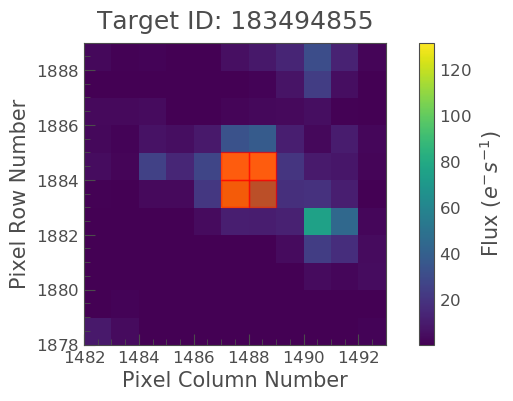

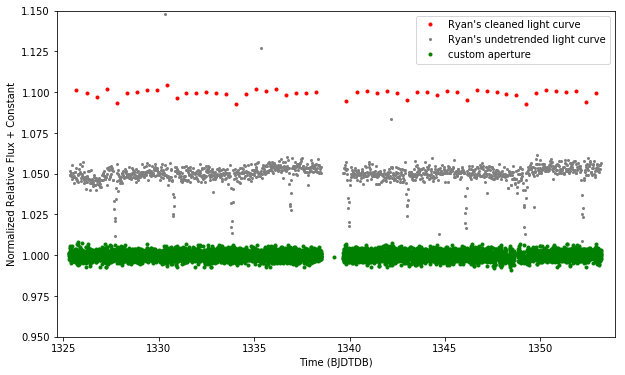

In [5]:
interesting = str(183494855)

for d in range(len(data)):
    if interesting in data[d]:
        print ("file number: ", d, "file name: ", data[d])
        x= data[d] #finding where specific light curve is in our cleaned light curve folder
        
print ("x=", x)        
print ("ra: ", 18.3812, "dec: ", -76.0526) 

print("Creating our cleaned light curve using Ryan Oelker's pipeline")

Nsig=3; bin_size=5; window_size=201; spacing=0.02


time     = np.transpose(np.loadtxt(x))[0] #first  (zero indexing in python) column 
mag      = np.transpose(np.loadtxt(x))[1] #second (zero indexing in python) column 
magerror = np.transpose(np.loadtxt(x))[2] #third (zero indexing in python) column 

mask = np.where(np.isnan(mag)==False)[0] #creating array of only real numbers by setting np.isnan(mag)==False. 
time = time[mask]                        #Sometimes there are holes in data filled with NaNs
mag = mag[mask]
magerror = magerror[mask]

flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
fluxerror = flux*(10.0**(magerror/2.5)-1.0)

#removing outliers with Chauvenet's criterion
# print ("using Chauvent's criterion")
# t2,f2,fe2 = ChauventsCriteron(time,flux,fluxerror) #experiment with Chauvent's criterion

print ("not using Chauvent's criterion")
t2,f2,fe2 = time, flux, fluxerror                  #and without Chauvent's criterion


lc = lk.LightCurve(t2,f2,fe2)
detrended_lc = lc.flatten(window_length=window_size).bin(binsize=bin_size)


print("Creating our cleaned light curve using a custom aperture")

from lightkurve import search_targetpixelfile

tic = str(183494855)
tpfs = search_targetpixelfile(tic,mission="TESS",radius=0.0001).download_all()
print (tpfs)



Nsig=3; bin_size=5; window_size=201; spacing=0.02
# Build the light curve
pipeline_lc = tpfs[0].to_lightcurve().flatten(window_length=window_size)
for tpf in tpfs:
    pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten(window_length=window_size))

tpf.plot(frame=100, aperture_mask=tpf.pipeline_mask, mask_color='red');
plt.savefig("TIC_"+interesting+"_NewAperture.png")
# Clean the light curve
pipeline_lc = pipeline_lc.remove_nans().remove_outliers()

#plot
plt.figure(figsize=(10,6))
plt.plot(detrended_lc.bin(binsize=bin_size).time,detrended_lc.bin(binsize=bin_size).flux+0.1,'r.',label="Ryan's cleaned light curve")
plt.plot(time,flux+0.05,c='grey',marker='.',markersize=4,linestyle='none',label="Ryan's undetrended light curve")
plt.plot(pipeline_lc.bin(binsize=bin_size).time,pipeline_lc.bin(binsize=bin_size).flux,'g.',label='custom aperture')
plt.xlabel("Time (BJDTDB)")
plt.ylabel("Normalized Relative Flux + Constant")
plt.legend(loc='best')
plt.xlim(np.min(detrended_lc.bin(binsize=bin_size).time)-1,np.max(detrended_lc.bin(binsize=bin_size).time)+1)
plt.ylim(0.95,1.15)
plt.savefig("TIC_"+interesting+"_Comparison.png")
plt.show()

file number:  150 file name:  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/180412528_sector01_3_3.lc
x= /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/180412528_sector01_3_3.lc
ra:  11.3509 dec:  -77.8688
Creating our cleaned light curve using Ryan Oelker's pipeline
not using Chauvent's criterion
Creating our cleaned light curve using a custom aperture
TargetPixelFileCollection of 1 objects:
TessTargetPixelFile(TICID: 180412528) 



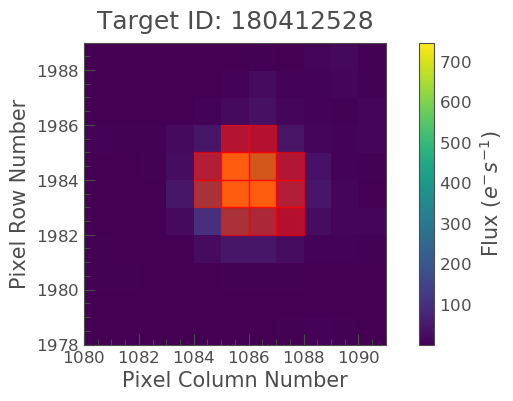

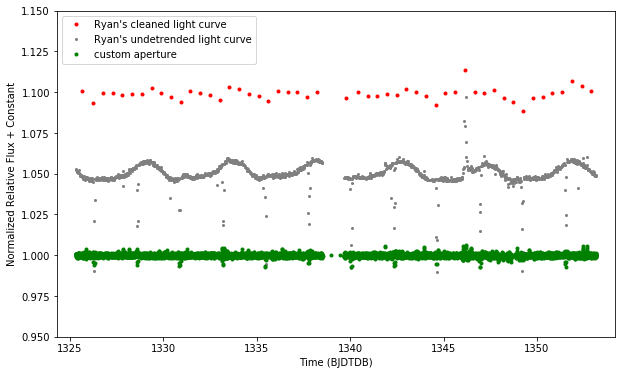

11.530000000000001  days
9.493949707144935 BJD
zoom in on one transit event:


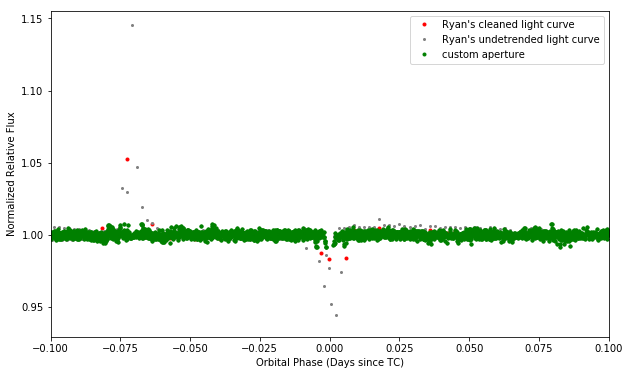

filenumber 1083
TIC Sector01/curves/clean/91452122_sector01_1_1


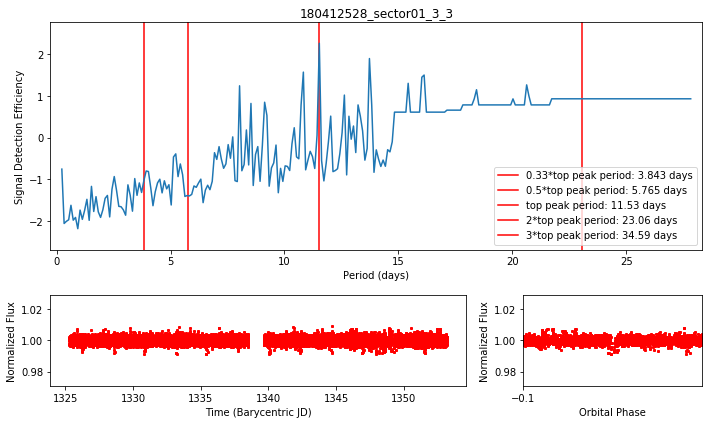


NOTE: This shows up in a TESS proposal as a flagged planet candidate! https://heasarc.gsfc.nasa.gov/docs/tess/data/approved-programs/G011180.txt


In [6]:
interesting = str(180412528)

for d in range(len(data)):
    if interesting in data[d]:
        print ("file number: ", d, "file name: ", data[d])
        x= data[d] #finding where specific light curve is in our cleaned light curve folder
        
print ("x=", x)        
print ("ra: ", 11.3509, "dec: ", -77.8688) 

print("Creating our cleaned light curve using Ryan Oelker's pipeline")

Nsig=3; bin_size=5; window_size=201; spacing=0.02


time     = np.transpose(np.loadtxt(x))[0] #first  (zero indexing in python) column 
mag      = np.transpose(np.loadtxt(x))[1] #second (zero indexing in python) column 
magerror = np.transpose(np.loadtxt(x))[2] #third (zero indexing in python) column 

mask = np.where(np.isnan(mag)==False)[0] #creating array of only real numbers by setting np.isnan(mag)==False. 
time = time[mask]                        #Sometimes there are holes in data filled with NaNs
mag = mag[mask]
magerror = magerror[mask]

flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
fluxerror = flux*(10.0**(magerror/2.5)-1.0)

#removing outliers with Chauvenet's criterion
# print ("using Chauvent's criterion")
# t2,f2,fe2 = ChauventsCriteron(time,flux,fluxerror) #experiment with Chauvent's criterion

print ("not using Chauvent's criterion")
t2,f2,fe2 = time, flux, fluxerror                  #and without Chauvent's criterion


lc = lk.LightCurve(t2,f2,fe2)
detrended_lc = lc.flatten(window_length=window_size).bin(binsize=bin_size)


print("Creating our cleaned light curve using a custom aperture")

from lightkurve import search_targetpixelfile

tic = str(180412528)
tpfs = search_targetpixelfile(tic,mission="TESS",radius=0.0001).download_all()
print (tpfs)

Nsig=3; bin_size=5; window_size=201; spacing=0.02
# Build the light curve
pipeline_lc = tpfs[0].to_lightcurve().flatten(window_length=window_size)
for tpf in tpfs:
    pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten(window_length=window_size))

tpf.plot(frame=100, aperture_mask=tpf.pipeline_mask, mask_color='red');
plt.savefig("TIC_"+interesting+"_NewAperture.png")
# Clean the light curve
pipeline_lc = pipeline_lc.remove_nans().remove_outliers()

#plot
plt.figure(figsize=(10,6))
plt.plot(detrended_lc.bin(binsize=bin_size).time,detrended_lc.bin(binsize=bin_size).flux+0.1,'r.',label="Ryan's cleaned light curve")
plt.plot(time,flux+0.05,c='grey',marker='.',markersize=4,linestyle='none',label="Ryan's undetrended light curve")
plt.plot(pipeline_lc.bin(binsize=bin_size).time,pipeline_lc.bin(binsize=bin_size).flux,'g.',label='custom aperture')
plt.xlabel("Time (BJDTDB)")
plt.ylabel("Normalized Relative Flux + Constant")
plt.legend(loc='best')
plt.xlim(np.min(pipeline_lc.bin(binsize=bin_size).time)-1,np.max(pipeline_lc.bin(binsize=bin_size).time)+1)
plt.ylim(0.95,1.15)
# plt.ylim(np.min(pipeline_lc.flux)-spacing, np.max(pipeline_lc.flux)+spacing)
plt.savefig("TIC_180412528_Comparison.png")
plt.show()

#doing BLS search:
bls = BoxLeastSquares(pipeline_lc.time, pipeline_lc.flux, pipeline_lc.flux_err)
periods = np.arange(0.23, (max(pipeline_lc.time)-min(pipeline_lc.time)), 0.1)
durations = np.arange((1.0/24.0), (5.0/24.0), 0.1) #1 hr to 5 hrs
periodogram = bls.power(periods, durations,objective='snr')

#phase folding with best BLS model
index = np.argmax(periodogram.power)
best_period = periodogram.period[index]; print(best_period, " days")
best_t0 = periodogram.transit_time[index]; print(best_t0, "BJD")


detrendedphasefoldedlc = [detrended_lc.fold(period=best_period,t0=best_t0).phase,detrended_lc.fold(period=best_period,t0=best_t0).flux, detrended_lc.fold(period=best_period,t0=best_t0).flux_err]
phasefoldedlc = [lc.fold(period=best_period,t0=best_t0).phase,lc.fold(period=best_period,t0=best_t0).flux, lc.fold(period=best_period,t0=best_t0).flux_err]
pipeline_phasefoldedlc = [pipeline_lc.fold(period=best_period,t0=best_t0).phase,pipeline_lc.fold(period=best_period,t0=best_t0).flux, pipeline_lc.fold(period=best_period,t0=best_t0).flux_err]


print ("zoom in on one transit event:")
plt.figure(figsize=(10,6))
plt.plot(detrendedphasefoldedlc[0],detrendedphasefoldedlc[1],'r.',label="Ryan's cleaned light curve")
plt.plot(phasefoldedlc[0],phasefoldedlc[1],c='grey',marker='.',markersize=4,linestyle='none',label="Ryan's undetrended light curve")
plt.plot(pipeline_phasefoldedlc[0],pipeline_phasefoldedlc[1],'g.',label='custom aperture')
plt.xlabel("Orbital Phase (Days since TC)")
plt.ylabel("Normalized Relative Flux")# + Constant")
plt.legend(loc='best')
# plt.xlim(np.min(pipeline_lc.bin(binsize=bin_size).time)-1,np.max(pipeline_lc.bin(binsize=bin_size).time)+1)
# plt.ylim(0.95,1.15)
# plt.ylim(np.min(pipeline_lc.flux)-spacing, np.max(pipeline_lc.flux)+spacing)
# plt.xlim(1330.65,1331.1)
plt.xlim(-0.1,0.1)
# plt.savefig("TIC_180412528_Comparison.png")
plt.show()


SDE = (periodogram.power - np.mean(periodogram.power))/np.std(periodogram.power)
cutoff_threshold=2.0

if len(np.where(SDE>cutoff_threshold)[0])>0:
    print("filenumber",d)
    print("TIC", data[d][37:-3])

    gs1 = gridspec.GridSpec(3, 3)
    gs1.update(left=0.65, right=1.25, wspace=0.25,hspace=0.5)


    f = plt.figure(figsize=(10,6))
    ax1 = f.add_subplot(gs1[:-1, :])
    ax2 = f.add_subplot(gs1[-1, :-1])
    ax3 = f.add_subplot(gs1[-1, -1])


#     ax1.plot(periodogram.period, periodogram.power, rasterized=True) 
    ax1.plot(periodogram.period, SDE, rasterized=True)
    plt.xticks(np.arange(0.0, 31.0, 1.0))
    ax1.set_title(str(x[59:-3]))
    ax1.set_xlabel("Period (days)")
    ax1.set_xlim(np.min(periodogram.period)-0.5, np.max(periodogram.period)+0.5)
#     ax1.set_ylabel("BLS Power SNR")
    ax1.set_ylabel("Signal Detection Efficiency")
#     ax1.set_ylim(np.min(periodogram.power)-0.5, np.max(periodogram.power)+0.5)
    ax1.set_ylim(np.min(SDE)-0.5, np.max(SDE)+0.5)
    ax1.axvline(x=(1.0/3.0)*best_period,color='r',label="0.33*top peak period: "+str( np.round((1.0/3.0)*best_period,3) )+" days" ,zorder=0) 
    ax1.axvline(x=(1.0/2.0)*best_period,color='r',label="0.5*top peak period: "+str( np.round((1.0/2.0)*best_period,3) )+" days",zorder=0) 
    ax1.axvline(x=best_period,color='r',label="top peak period: "+str( np.round(best_period,3) )+" days" ,zorder=0) 
    ax1.axvline(x=(2.0)*best_period,color='r',label="2*top peak period: "+str( np.round((2.0)*best_period,3) )+" days",zorder=0) 
    ax1.axvline(x=(3.0)*best_period,color='r',label="3*top peak period: "+str( np.round((3.0)*best_period,3) )+" days",zorder=0) 
    ax1.legend(loc='best',fancybox=True)
    
    ax2.plot(pipeline_lc.time,pipeline_lc.flux,c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig))
#     ax2.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
#     ax2.legend(loc='upper right')
#     ax2.set_ylim(0.985,1.015)
    ax2.set_ylim(np.min(pipeline_lc.flux)-spacing, np.max(pipeline_lc.flux)+spacing)
    ax2.set_xlabel("Time (Barycentric JD)")
    ax2.set_ylabel("Normalized Flux") 

    ax3.plot(pipeline_phasefoldedlc[0],pipeline_phasefoldedlc[1],c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig))
#     ax3.plot(phasefoldedlc[0],phasefoldedlc[1],c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
#     ax3.legend(loc='upper right')
    ax3.set_xlabel("Orbital Phase")
    ax3.set_ylabel("Normalized Flux") 
#     ax3.set_ylim(0.985,1.015)
    ax3.set_ylim(np.min(pipeline_lc.flux)-spacing, np.max(pipeline_lc.flux)+spacing)
#     ax3.set_xticks(np.arange(np.min(detrendedphasefoldedlc[0]),np.max(detrendedphasefoldedlc[0])+0.25,0.25))
    ax3.set_xticks(np.arange(-0.1,0.1,0.2))
    ax3.set_xlim(-0.1,0.1)
    gs1.tight_layout(f)

    plt.savefig("plots/"+str(x[59:-3])+".png", dpi=400, rasterized=True,bbox_inches='tight')        
    plt.show()    
    print( "") #adds space between figures

print ("NOTE: This shows up in a TESS proposal as a flagged planet candidate! https://heasarc.gsfc.nasa.gov/docs/tess/data/approved-programs/G011180.txt")    

In [7]:
    # # 50443061

    # print("Creating our cleaned light curve using a custom aperture")

    # from lightkurve import search_targetpixelfile

    # tic = str(50443061)
    # tpfs = search_targetpixelfile(tic,mission="TESS",radius=0.0001).download_all()
    # print (tpfs)

    # Nsig=3; bin_size=5; window_size=201; spacing=0.02
    # # Build the light curve
    # pipeline_lc = tpfs[0].to_lightcurve().flatten(window_length=window_size)
    # for tpf in tpfs:
    #     pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten(window_length=window_size))

    # tpf.plot(frame=100, aperture_mask=tpf.pipeline_mask, mask_color='red');
    # plt.savefig("TIC_"+interesting+"_NewAperture.png")    
    # # Clean the light curve
    # pipeline_lc = pipeline_lc.remove_nans().remove_outliers()

    # #plot
    # plt.figure(figsize=(10,6))
    # # plt.plot(detrended_lc.bin(binsize=bin_size).time,detrended_lc.bin(binsize=bin_size).flux+0.1,'r.',label="Ryan's cleaned light curve")
    # # plt.plot(time,flux+0.05,c='grey',marker='.',markersize=4,linestyle='none',label="Ryan's undetrended light curve")
    # plt.plot(pipeline_lc.bin(binsize=bin_size).time,pipeline_lc.bin(binsize=bin_size).flux,'g.',label='custom aperture')
    # plt.xlabel("Time (BJDTDB)")
    # plt.ylabel("Normalized Relative Flux + Constant")
    # plt.legend(loc='best')
    # plt.xlim(np.min(pipeline_lc.bin(binsize=bin_size).time)-1,np.max(pipeline_lc.bin(binsize=bin_size).time)+1)
    # plt.ylim(0.95,1.15)
    # plt.savefig("TIC_50443061_Comparison.png")
    # plt.show()

    # #doing BLS search:
    # bls = BoxLeastSquares(pipeline_lc.time, pipeline_lc.flux, pipeline_lc.flux_err)
    # periods = np.arange(0.23, (max(pipeline_lc.time)-min(pipeline_lc.time)), 0.1)
    # durations = np.arange((1.0/24.0), (5.0/24.0), 0.1) #1 hr to 5 hrs
    # periodogram = bls.power(periods, durations,objective='snr')

    # #phase folding with best BLS model
    # index = np.argmax(periodogram.power)
    # best_period = periodogram.period[index]; print(best_period, " days")
    # best_t0 = periodogram.transit_time[index]; print(best_t0, "BJD")

    # detrendedphasefoldedlc = [pipeline_lc.fold(period=best_period,t0=best_t0).phase,pipeline_lc.fold(period=best_period,t0=best_t0).flux, pipeline_lc.fold(period=best_period,t0=best_t0).flux_err]
    # # phasefoldedlc = [lc.fold(period=best_period,t0=best_t0).phase,lc.fold(period=best_period,t0=best_t0).flux, lc.fold(period=best_period,t0=best_t0).flux_err]


    # SDE = (periodogram.power - np.mean(periodogram.power))/np.std(periodogram.power)
    # cutoff_threshold=2.0

    # if len(np.where(SDE>cutoff_threshold)[0])>0:
    #     print("filenumber",d)
    #     print("TIC", data[d][37:-3])

    #     gs1 = gridspec.GridSpec(3, 3)
    #     gs1.update(left=0.65, right=1.25, wspace=0.25,hspace=0.5)


    #     f = plt.figure(figsize=(10,6))
    #     ax1 = f.add_subplot(gs1[:-1, :])
    #     ax2 = f.add_subplot(gs1[-1, :-1])
    #     ax3 = f.add_subplot(gs1[-1, -1])


    # #     ax1.plot(periodogram.period, periodogram.power, rasterized=True) 
    #     ax1.plot(periodogram.period, SDE, rasterized=True)
    #     plt.xticks(np.arange(0.0, 31.0, 1.0))
    #     ax1.set_title(str(x[59:-3]))
    #     ax1.set_xlabel("Period (days)")
    #     ax1.set_xlim(np.min(periodogram.period)-0.5, np.max(periodogram.period)+0.5)
    # #     ax1.set_ylabel("BLS Power SNR")
    #     ax1.set_ylabel("Signal Detection Efficiency")
    # #     ax1.set_ylim(np.min(periodogram.power)-0.5, np.max(periodogram.power)+0.5)
    #     ax1.set_ylim(np.min(SDE)-0.5, np.max(SDE)+0.5)
    #     ax1.axvline(x=(1.0/3.0)*best_period,color='r',label="0.33*top peak period: "+str( np.round((1.0/3.0)*best_period,3) )+" days" ,zorder=0) 
    #     ax1.axvline(x=(1.0/2.0)*best_period,color='r',label="0.5*top peak period: "+str( np.round((1.0/2.0)*best_period,3) )+" days",zorder=0) 
    #     ax1.axvline(x=best_period,color='r',label="top peak period: "+str( np.round(best_period,3) )+" days" ,zorder=0) 
    #     ax1.axvline(x=(2.0)*best_period,color='r',label="2*top peak period: "+str( np.round((2.0)*best_period,3) )+" days",zorder=0) 
    #     ax1.axvline(x=(3.0)*best_period,color='r',label="3*top peak period: "+str( np.round((3.0)*best_period,3) )+" days",zorder=0) 
    #     ax1.legend(loc='best',fancybox=True)

    #     ax2.plot(pipeline_lc.time,pipeline_lc.flux,c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig))
    # #     ax2.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
    # #     ax2.legend(loc='upper right')
    # #     ax2.set_ylim(0.985,1.015)
    #     ax2.set_ylim(np.min(pipeline_lc.flux)-spacing, np.max(pipeline_lc.flux)+spacing)
    #     ax2.set_xlabel("Time (Barycentric JD)")
    #     ax2.set_ylabel("Normalized Flux") 

    #     ax3.plot(detrendedphasefoldedlc[0],detrendedphasefoldedlc[1],c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig))
    # #     ax3.plot(phasefoldedlc[0],phasefoldedlc[1],c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
    # #     ax3.legend(loc='upper right')
    #     ax3.set_xlabel("Orbital Phase")
    #     ax3.set_ylabel("Normalized Flux") 
    # #     ax3.set_ylim(0.985,1.015)
    #     ax3.set_ylim(np.min(pipeline_lc.flux)-spacing, np.max(pipeline_lc.flux)+spacing)
    #     ax3.set_xticks(np.arange(np.min(detrendedphasefoldedlc[0]),np.max(detrendedphasefoldedlc[0])+0.25,0.25))
    #     ax3.set_xlim(-0.1,0.1)
    #     gs1.tight_layout(f)

    #     plt.savefig("plots/"+str(x[59:-3])+".png", dpi=400, rasterized=True,bbox_inches='tight')        
    #     plt.show()    
    #     print( "") #adds space between figures


Creating our cleaned light curve using a custom aperture
None


/Users/felizd/anaconda/envs/py3.6/lib/python3.6/site-packages/lightkurve/search.py:209: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# tic = str(50443061)
# tic = str(50443065)
# tpfs = search_targetpixelfile(tic,mission="TESS",radius=100).download_all()
# print (tpfs)